#Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns

#Data Input

In [ ]:
#Reading train dataset first to fit the model and then read test dataset to validate
#pd_df = pd.read_csv('/content/MNIST_train.csv')
pd_df = pd.read_csv('/content/MNIST_test.csv')

In [ ]:
pd_df.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [ ]:
#Dropping the two columns to have clarity with observations and features
df = pd_df.drop(['Unnamed: 0', 'index'], axis=1)

In [ ]:
df

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[59999][0]

<ipython-input-20-293bda68c6e0>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[59999][0]


8

In [ ]:
df.iloc[0][0]

<ipython-input-6-01306538005d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0]


5

In [ ]:
data = np.array(df.iloc[0][1:]).reshape(28,28)

In [ ]:
data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

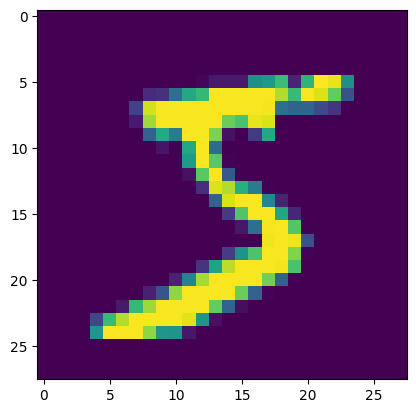

In [ ]:
plt.imshow(data)

In [ ]:
X = df.to_numpy()

In [ ]:
X

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = X[:,0]

In [ ]:
y

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
X = X[:,1:]

In [ ]:
X.shape

(10000, 784)

In [ ]:
y.shape

(10000,)

In [ ]:
X = X[500]

In [ ]:
X_reshaped = X.reshape(28,28)

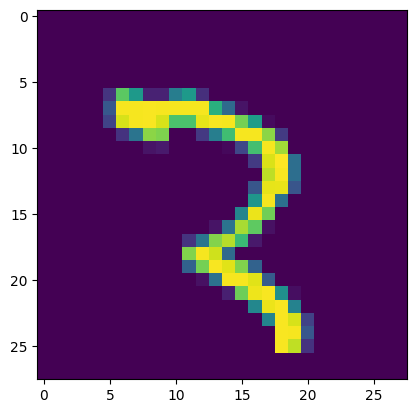

In [ ]:
#Doing reshaping and imshow() just to view an image in 28X28 pixels
plt.imshow(X_reshaped)

In [ ]:
#Normalizing using min max scaling
X = X/255

##Data Visualizations

#Naive Bayes Classifier

In [ ]:
from scipy.stats import multivariate_normal as mvn

In [ ]:
class GausNB():

  def fit(self,X, y, epsilon=1.1e-2):#included epsilon to avoid zerodevison error

    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int)) #passing y to set beacuse of duplicate items if any

    for k in self.K:
      X_k = X[y==k,:]
      self.likelihoods[k] = {
          'mean':X_k.mean(axis=0),
          'cov':X_k.var(axis=0)+ epsilon
          }
      self.priors[k] = len(X_k)/len(X)

  def predict(self,X):

    N,D = X.shape #N is rows, D is columns
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'],l['cov'])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [ ]:
#This function calculates accuracy between actual class label(i.e. y) and predicted class label(i.e. y_hat)
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
nb = GausNB()

In [ ]:
nb.fit(X,y)

In [ ]:
y_hat = nb.predict(X)

In [ ]:
accuracy(y,y_hat)
#train: 0.5938 #normalize: 0.7682 #normalize+tune:0.80201
#test:0.5878  #(normalize+tune):0.8146

0.8146

In [ ]:
def conf_matrix(y,y_hat):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y, name='Actual')
  y_pred = pd.Series(y_hat, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

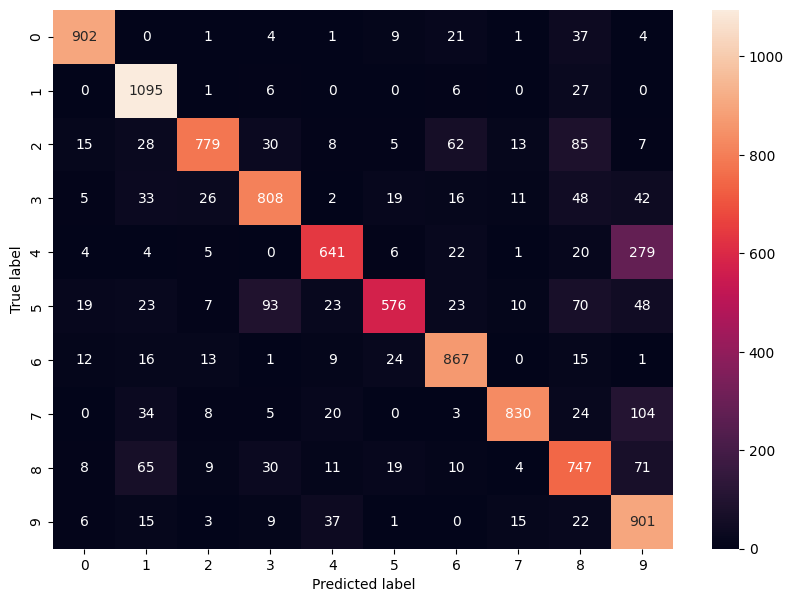

In [ ]:
conf_matrix(y,y_hat)